<a href="https://colab.research.google.com/github/juanfra68/IA_bigData/blob/main/7RO_Tarea2_Juan_Francisco_Dom%C3%ADnguez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1CEIABDTA - 7RO

Programación de Inteligencia Artificial (BDIA_PIA)

PROFESOR: Carlos Fernández de la Torre

ALUMNO: Juan Francisco Domínguez Domínguez

TAREA 2 (23-24) RECORRIDO EN ABANICO

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

In [11]:
# FUNCION PARA DESCUBRIR EL CAMINO DE ORIGEN A DESTION
def bfs(maze, start, end):
    rows, cols = len(maze), len(maze[0])
    # SE CREA LA MATRIZ DE MARCA DE PASO
    visited = [[False] * cols for _ in range(rows)]
    # SE CREA LA COLA PARA RECORRER EL LABERINTO
    queue = deque([(start[0], start[1], [])])

    while queue:
        # SACA EL PRIMER ELEMENTO DE LA COLA
        current_row, current_col, path = queue.popleft()
        # SI ES LA CASILLA FINAL, SALE DEVOLVIENDO EL CAMINO
        if (current_row, current_col) == end:
            return path + [(current_row, current_col)]

        # SI SE ESTÁ DENTRO DEL LABERINTO
        if 0 <= current_row < rows and 0 <= current_col < cols and maze[current_row][current_col] == 0 and not visited[current_row][current_col]:
            # MARCA COMO VISITADA LA CASILLA
            visited[current_row][current_col] = True
            # MATRIZ DE RECORRIDO DE LAS CELDAS ADYACENTES
            neighbors = [
                (current_row - 1, current_col),
                (current_row + 1, current_col),
                (current_row, current_col - 1),
                (current_row, current_col + 1)
            ]
            for neighbor in neighbors:
                # SE AÑADEN LAS CELDAS ADYACENTES A LA COLA
                queue.append((neighbor[0], neighbor[1], path + [(current_row, current_col)]))

    # SI NO ENCUENTRA LA SALIDA, DEVUELVE NULO
    return None

In [12]:
# FUNCIÓN PARA IMPRIMIR EN CONSOLA LA MATRIZ
def print_maze(maze, path):
    for i, row in enumerate(maze):
        for j, cell in enumerate(row):
            if (i, j) == start:
                print('S', end=' ')
            elif (i, j) == end:
                print('E', end=' ')
            elif (i, j) in path:
                print('.', end=' ')
            elif cell == 1:
                print('#', end=' ')
            else:
                print(' ', end=' ')
        print()

In [13]:
# FUNCIÓN PARA IMPRIMIR EL GRÁFICO DE LA MATRIZ
def plot_maze(maze, path):
    maze_array = np.array(maze)
    rows, cols = maze_array.shape
    cmap = plt.cm.gray
    plt.imshow(maze_array, cmap=cmap, interpolation='none', origin='upper')

    if path:
        path_array = np.zeros_like(maze_array)
        for r, c in path:
            path_array[r, c] = 1
        plt.imshow(path_array, cmap=plt.cm.Blues, interpolation='none', origin='upper', alpha=0.5)

    plt.xticks(np.arange(0.5, cols, 1), [])
    plt.yticks(np.arange(0.5, rows, 1), [])
    plt.grid(color='k', linestyle='-', linewidth=2)
    plt.show()

Camino encontrado:
S #       
. #   #   
.     #   
. # # #   
. . . . E 
---------------------------


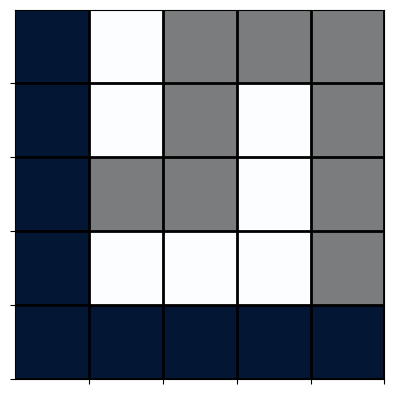

In [14]:
# Ejemplo usado:
maze = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
]

start = (0, 0)
end = (4, 4)

path = bfs(maze, start, end)

if path:
    print("Camino encontrado:")
    print_maze(maze, path)
    print(f'---------------------------')
    plot_maze(maze, path)
else:
    print("Camino no encontrado.")


FIN